# Example 2: Running PPI with Retrospective Goals

## Import the necessary libraries

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import ppi

## Load data

In [12]:
data = pd.read_csv('final_sample_normalized.csv', sep='\t', header=0, low_memory=False, encoding='utf-16') # indicators
alphas = np.loadtxt('alphas.csv') # growth factors
A = np.loadtxt('network.csv') # network
phi, tau = np.loadtxt('governance_params.csv') # governance parameters

## Prepare data for PPI

In [26]:
series = data[[str(year) for year in range(2006, 2017)]].values
I0, T = ppi.get_targets(series)
R = data['instrumental'].values
colors = dict(zip(data.index, data.goalColor))

## Run PPI one time

In [36]:
outputs = ppi.run_ppi(I0, T, A=A, alpha=alphas, R=R, phi=phi, tau=tau)
tsI, tsC, tsF, tsP, tsD, tsS, times, H = outputs

(141, 46)

## Plot dynamics

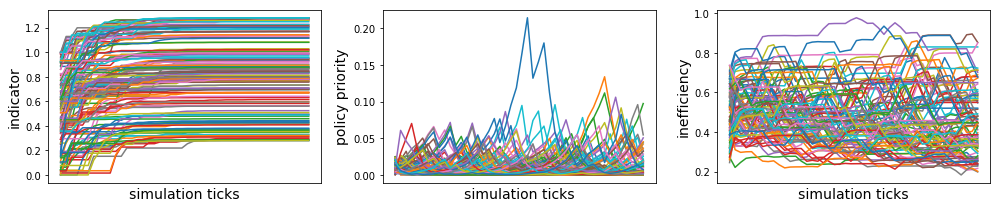

In [48]:

fig = plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
for i in range(len(data)):
    plt.plot(tsI[i], mfc=colors[i])
plt.xticks([])
plt.xlabel('simulation ticks', fontsize=14)
plt.ylabel('indicator', fontsize=14)

plt.subplot(1,3,2)
for i in range(sum(R)):
    plt.plot(tsP[i], mfc=colors[i])
plt.xticks([])
plt.xlabel('simulation ticks', fontsize=14)
plt.ylabel('policy priority', fontsize=14)

plt.subplot(1,3,3)
for i in range(sum(R)):
    plt.plot(tsD[i]/tsP[i], mfc=colors[i])
plt.xticks([])
plt.xlabel('simulation ticks', fontsize=14)
plt.ylabel('inefficiency', fontsize=14)

plt.tight_layout()
plt.show()